<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

## **LabSummaryDF**

In [4]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

LabSummaryDF = pd.DataFrame(lab_count)

## **LabList**

> Replace Item with List then create new table to store the value

In [3]:
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [5]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the lab_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

In [6]:
lab

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,2558-02-19 16:16:51.423,NaN,FT,NaN,NaN,lab31,lab31
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4,lab11,
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2558-02-19 10:32:21.610,NaN,44,NaN,42 - 121,,
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",2558-02-19 10:32:21.390,NaN,17,NaN,4 - 36,,
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",2558-02-19 10:32:21.500,NaN,23,NaN,12 - 32,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21641518,938,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-18 15:45:10.313,NaN,179,mg/dL,74-109,,
21641519,939,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-18 20:27:14.767,NaN,154,mg/dL,74-109,,
21641520,940,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-19 07:42:36.180,NaN,175,mg/dL,74-109,,
21641521,941,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-19 11:35:32.680,NaN,167,mg/dL,74-109,,


In [9]:
lab0 = pd.DataFrame(lab)

In [7]:
lab = lab[['LabNo','PatientUID', 'PatientVisitUID','CWhen','ResultItemName','RequestItemName','ResultValue', 'LabelResult', 'LabelRequest']]

## **Define**

> มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
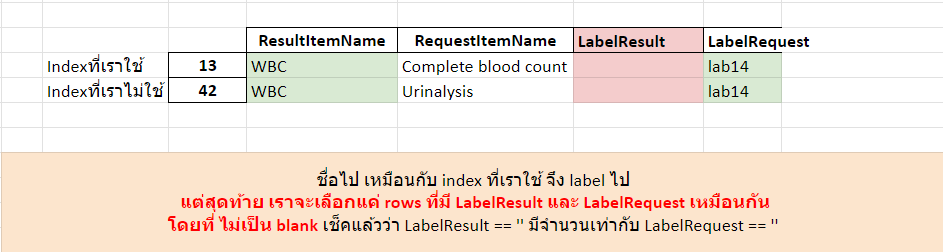

## **Recheck mapping**

In [ ]:
lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab3'), 'LabelRequest'] = 'lab1' #L1:eGFR
lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab12' #L12:Hb
lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab13' #L13:HCT
lab0.loc[(lab0['LabelResult'] == 'lab14') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab14' #L14:WBC

In [22]:
lab0[lab0['LabelResult']== 'lab2']['LabelRequest'].unique()

array(['lab2', '', 'lab9'], dtype=object)

In [23]:
lab0[(lab0['LabelResult']== 'lab2') & (lab0['LabelRequest'] == 'lab9')]

,LabNo,PatientUID,PatientVisitUID,CWhen,ResultItemName,RequestItemName,ResultValue,LabelResult,LabelRequest
1264460,1,114274,2131685,2558-04-04 10:51:40.290,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,1.00,lab2,lab9
1946677,1,156771,2365043,2558-07-11 09:51:01.140,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,"1,492.20",lab2,lab9
3000407,1,276771,2261283,2558-05-30 09:44:14.263,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,220.40,lab2,lab9
4246728,1,532115,2172585,2558-04-24 10:23:24.327,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,23.70,lab2,lab9
5263380,1,695821,2134411,2558-04-07 09:46:24.077,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,102.70,lab2,lab9
6256446,1,839007,2177465,2558-04-27 08:57:01.087,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,2.80,lab2,lab9
6843628,1,918073,2172350,2558-04-24 10:20:57.783,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,1.20,lab2,lab9
10134672,1,1386586,2177676,2558-04-27 09:24:30.480,"MICROALBUMINURIA IN RANDOM URINE, 34116",Urine Albumin/Creatinine Ratio,513.00,lab2,lab9


In [24]:
LabSummaryDF.loc[[3, 129, 185, 312]]

,Location,ResultItemName,RequestItemName,Count
3,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BICARBONATE, 32105",BICARBONATE,482723
129,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"MICROALBUMINURIA IN RANDOM URINE, 34116",MICROALBUMINURIA IN RANDOM URINE,18580
185,ห้องปฏิบัติการคณะเภสัชศาสตร์,TDM-TACROLIMUS(PROGRAF)(คณะเภสัช),TDM-TACROLIMUS TDX (PROGRAF) (คณะเภสัช),8290
312,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"C3, 37102",C3,1882


In [ ]:
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}